# Lecture 7: Characterizing networks with fading channels                 

## 1. Aggregate interference without fading

Let $\ell: \mathbb{R}^d \mapsto \mathbb{R}$. If $\Phi$ is a point process that models the positions of transmitters (all transmitting at unit power without considering fading), the sum power measured at location $y$ is given by:

<br><center>$ \displaystyle I(y)  = \sum\limits_{x \in \Phi} \ell(y-x), \;\; y \in \mathbb{R}^d.$ </center></br>

It is interesting to note that $I(y)$ is a *shot-noise random field*. If $\ell(x) = ||x||^{-\alpha}$ (or a bounded version of it), then we have a *power-law shot-noise random field*. More details of it can be found in the reference.

### 1.1 Mean interference

**Exercise:** Let $\Phi$ be a homogeneous Poisson point process with intensity $\lambda$ in $\mathbb{R}^2$. What is the $\mathbb{E}I$ when (a) $\ell(x) = ||x||^{-\alpha}$ and (b) $\ell(x) = \min(1,||x||^{-\alpha})$ for $\alpha>2$? What is the difference?


*Hint (Campbell Theorem):* Let $\Phi$ be a point process in  $\mathbb{R}^d$ and $f:\mathbb{R}^d \mapsto \mathbb{R}$ be a measurable function. Then the random sum:

<br><center> $S = \displaystyle{\sum\limits_{x \in \Phi} f(x)}$ </center></br>

is a random variable with mean

<br><center> $\mathbb{E}S = \displaystyle{\int_{\mathbb{R}^d} f(x) \; \Lambda(\mathrm{d}x)}.$ </center></br>


If $\Phi$ has an intensity function $\lambda(x)$, then

<br><center> $\mathbb{E}S = \displaystyle{\int_{\mathbb{R}^d} f(x) \lambda(x) \; \mathrm{d}x}.$ </center></br>

### 1.2 Interference distribution

*Review:* In our lecture 5, we saw that we can **lower-bound** the aggregate interference by using the nearest point (closest interferer). When $\Phi$ be a homogeneous Poisson point process with intensity $\lambda$ in $\mathbb{R}^2$ and $\ell(x) = ||x||^{-\alpha}$, we have

<br><center>$\displaystyle \mathbb{P} (I_1 \leq x) = \mathbb{P} (R_1^{-\alpha} \leq x) = \mathbb{P} (R_1 \leq x^{-1/\alpha} ) = e^{-\lambda \pi x^{-2/\alpha}},$ </center></br>

with mean: 

<br><center>$\displaystyle \mathbb{E}I_1 = \pi^{\alpha/2}\;\Gamma\left(1 - \frac{\alpha}{2}\right).$ </center></br>

Note that if $\alpha > 2$, the $\mathbb{E}I_1$ does not exist. This means that even the mean interference related to the closest transmitter is infinite when the *singular* path-loss is assumed. These expressions can be also generalized to the $n$th nearest intereferer.

**Closed-form expression:** The Fourrier transform of the aggregate interference distribution when $\alpha>2$ is computed as:

<br><center>$\displaystyle \mathcal{F}_I(\omega) = \exp\left( -\lambda \pi \Gamma\left(1 - \frac{\alpha}{2}\right) \omega^{2/\alpha} e^{j \pi/\alpha} \right).$ </center></br>

When $\alpha = 4$, we have the only case where the closed-form expression for the density exists:

<br><center>$\displaystyle f_I(x) = \dfrac{\pi \lambda}{2 x^{3/2}} \exp\left( - \frac{\pi^3 \lambda^2}{4x}\right).$ </center></br>


*Outline of proof*

[Step 1] Consider the interference from nodes located within a given distance $a$. Note that When $a \rightarrow \infty$, then $I_a \rightarrow I$.

[Step 2] Find the Fourrier transform of $I_a$, conditioning on the existence of $k$ nodes that are uniformly distributed in the area determined by $a$.

[Step 3] Unconditioning the Fourried transform knowing that the distribution on nodes is Poisson, which can be interpreted as the Taylor distribution of the exponential function.

[Step 4] After manipulation, we find that the integral diverge if $\alpha\leq2$. When $\alpha > 2$ we have the equation presented above.

In [3]:
import numpy as np
from scipy.spatial import distance
from __future__ import division

#pathloss
alpha=4
#Average number of points (Poisson)
x_average_PPP = 100
#Square side: L
L = 50
#
num_realizations = 1000
interference = np.zeros(num_realizations)
for count in range(0, num_realizations):
        #Number of points N that is a Poisson random variable 
        x_realization_PPP = np.random.poisson(x_average_PPP,1)
        #Random points in axis x
        position_x_realization_PPP =  np.random.uniform(0,L,x_realization_PPP)
        #Random points in axis y
        position_y_realization_PPP = np.random.uniform(0,L,x_realization_PPP) 
        #Manipulating arrays
        position_x_realization_PPP_t=np.transpose(position_x_realization_PPP)
        position_y_realization_PPP_t=np.transpose(position_y_realization_PPP)
        position_final = []
        position_final = [[position_x_realization_PPP_t[ix], position_y_realization_PPP_t[ix]] for ix in range(0, x_realization_PPP)]
        #Distances to the origin (L/2,L/2)
        distances_to_origin = [distance.euclidean(position_final[ix],[L/2,L/2]) for ix in range(0, x_realization_PPP)]
        #getting the power of each interferer
        path_loss = np.array([distances_to_origin[xx]**(-alpha) for xx in range(0, x_realization_PPP)])
        #computing aggregate interference
        interference[count] = sum(path_loss) 
        count = count + 1

#print interference
#print np.mean(interference)
#print interference

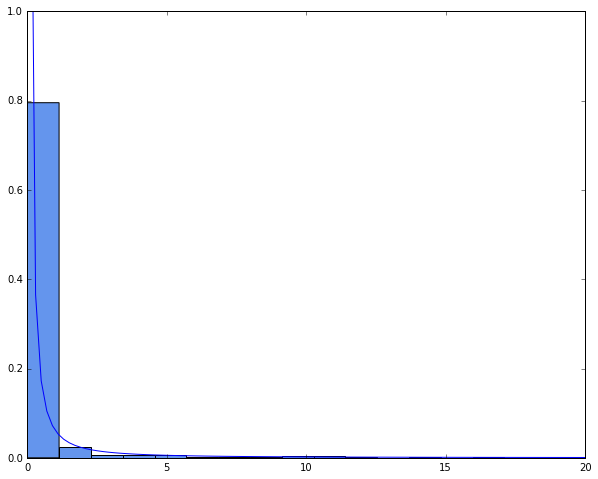

In [5]:
#Testing pdf
import matplotlib.pyplot as plt
from __future__ import division
x = np.linspace(0.1,20,100)
#
plt.figure(figsize=(10,8), dpi=1200)
plt.hist(interference,10000,normed=1, color="#6495ED")
plt.axis([0,20,0,1])
#
plt.plot(x, (np.pi *(x_average_PPP/(L**2))/(2*x**(1.5)) * np.exp(- (np.pi**3 * (x_average_PPP/(L**2))**2)/(4*x) )), '-')
plt.show()

## 2. Aggregate interference with fading

Let  $\tilde{\Phi} = \{ (x_i, h_i)\}$ be marked process such that $\Phi = \{ x_i\}$ reprensents the location of the transmitters and $h_i$ is the mark related to the fading coefficient gain associated to a probability distribution, which are assumed independent and identically distributed random variables. 

The aggregate interference at the origin is then:

<br><center>$ \displaystyle I  = \sum\limits_{x \in \Phi} h_x \ell(x).$ </center></br>

To manipulate this random variable, we would like to compute the Laplace transform of $I$.

<br><center>$ \displaystyle \mathcal{L}(s) = \mathbb{E} e^{-sI}  = \mathbb{E}\left( \prod\limits_{x\in \Phi} e^{-s h_x \ell(x)}  \right) = 
\mathbb{E}_\Phi\left( \prod\limits_{x\in \Phi} \mathbb{E}_h \left( e^{-s h_x \ell(x)} \right)  \right).$ </center></br> 



If we assume that $\Phi$ is a uniform Poisson point process in $\mathbb{R}^2$ with density $\lambda$, then we can map the process to one dimension such that:

<br><center>$\displaystyle \lambda(r) = \int_{b(o,r)} \lambda(x) \; \mathrm{d}x =  \lambda \; 2 \pi r$.</center></br> 

Note that this can be extended to $\mathbb{R}^d$.

Now let us review the probability generating functional (pgfl):

**Theorem:** Let $v \in \mathcal{V}$ be measurable, and $\Phi$ be a Poisson process with intensity $\Lambda$. Then:

<br><center> 
$\displaystyle G[v] \triangleq \mathbb{E}\left( \prod\limits_{x\in \phi} v(x) \right) = \exp\left( - \int_{\mathbb{R}^d} (1-v(x)) \; \Lambda(\mathrm{d}x)  \right).$
</center></br>

Now we would like to compute the pglf when $v(r) = \mathbb{E}_h\left( e^{-sh\ell(r)}\right)$. Then:

<br><center> 
$\displaystyle G[v] = \mathbb{E}_\Phi\left( \prod\limits_{x\in \Phi} \mathbb{E}_h \left( e^{-s h_x \ell(x)} \right)  \right) =  \exp\left( - \int_0^\infty \mathbb{E}_h\left(1- e^{-sh\ell(r)}\right) \lambda(r) \; \mathrm{d}r  \right).$
</center></br>

From this, we have:

<br><center> 
$\displaystyle \mathcal{L}(s) = \mathbb{E}_\Phi\left( \prod\limits_{x\in \Phi} \mathbb{E}_h \left( e^{-s h_x \ell(x)} \right)  \right) = G[v] = \exp\left( - \int_0^\infty \mathbb{E}_h\left(1- e^{-sh\ell(r)}\right) \lambda(r) \; \mathrm{d}r  \right) .$
</center></br>

Now we should analyze the integral conditioning on $h$:

<br><center> 
$\displaystyle  \int_0^\infty \left(1- e^{-sh\ell(r)}\right) \lambda(r) \; \mathrm{d}r = \lambda \pi (hs)^{2/\alpha} \Gamma\left(1 - \dfrac{2}{\alpha} \right).$
</center></br>

The Laplace is therefore:

<br><center> 
$\displaystyle \mathcal{L}(s) = \exp\left( - \lambda \pi \mathbb{E}_h\left(h^{2/\alpha}\right)  s^{2/\alpha} \; \Gamma\left(1 - \dfrac{2}{\alpha} \right)\right).$
</center></br>


For example, when Rayleigh fading is considered, $h$ is an exponential distribution such that the cdf is $F_X(x) = 1 -e^{-x}$ if $x\geq 0$ and $F_X(x) = 0$ if $x<0$.  Then: $\mathbb{E}_h\left(h^{2/\alpha}\right) = \Gamma\left(1 + \dfrac{2}{\alpha} \right)$.

### 3. Success and outage probabilities

**Definition:** Let us define the success probability as the probability that the signal-to-interference ratio is greater than a given threshold determined by the coding-decoding scheme considered, i.e. $p_\textrm{s} = \mathbb{P}(\textrm{SIR}> \beta)$. The outage probability is the probability that the message is not successfuly decoded, i.e. $p_\textrm{o} =\mathbb{P}(\textrm{SIR} \leq \beta) = 1- p_\textrm{s}$.

**Exercise:** Let  $\tilde{\Phi} = \{ (x_i, h_i)\}$ be marked Poisson point process in $\mathbb{R}^2$ such that $\Phi = \{ x_i\}$ reprensents the location of the transmitters and $h_i$ is the mark related to the fading coefficient gain in relation to the origin where the receiver of the link under analysis is located. We assume that $h_i$ are exponential, independent and identically distributed, random variables (i.e. Rayleigh fading) with mean 1. If the links are also subject to a distance-dependent path-loss function $\ell(x) = ||x||^{-\alpha}$ , compute the success probability 
$\mathbb{P}(\textrm{SIR}_o > \beta)$. Compare this result with the bound derived in the scenario without fading.

In [6]:
#Testing
import numpy as np
from scipy.spatial import distance
from __future__ import division
#pathloss
alpha=3
#SIR required
beta= 3
#aloha prob
p=1
#Average number of points (Poisson)
x_average_PPP = p*25
#Square side: L
L = 30
#number of realizations to get the outage prob for 1 point
num_realizations = 2000
#number of simulation points
num_of_point_for_outage = 50
#
outage_prob = np.zeros(num_of_point_for_outage)
r = np.linspace(0,4,num_of_point_for_outage)

for count2 in range(1, num_of_point_for_outage):
    outage = 0
    for count in range(0, num_realizations):
        #Number of points N that is a Poisson random variable 
        x_realization_PPP = np.random.poisson(x_average_PPP,1)
        #Random points in axis x
        position_x_realization_PPP =  np.random.uniform(0,L,x_realization_PPP)
        #Random points in axis y
        position_y_realization_PPP = np.random.uniform(0,L,x_realization_PPP) 
        #Manipulating arrays
        position_x_realization_PPP_t=np.transpose(position_x_realization_PPP)
        position_y_realization_PPP_t=np.transpose(position_y_realization_PPP)
        position_final = []
        position_final = [[position_x_realization_PPP_t[ix], position_y_realization_PPP_t[ix]] for ix in range(0, x_realization_PPP)]
        #Distances to the origin (L/2,L/2)
        distances_to_origin = [distance.euclidean(position_final[ix],[L/2,L/2]) for ix in range(0, x_realization_PPP)]
        #getting the power of each interferer
        path_loss_fading = np.array([np.random.exponential(1) * distances_to_origin[xx]**(-alpha) for xx in range(0, x_realization_PPP)])
        #computing aggregate interference
        interference = sum(path_loss_fading)
        if (np.random.exponential(1) * r[count2]**(-alpha)/interference) <= beta:
                outage = outage + 1   
        count = count + 1
    outage_prob[count2] = outage/count
    count2 = count2 + 1
#print outage_prob

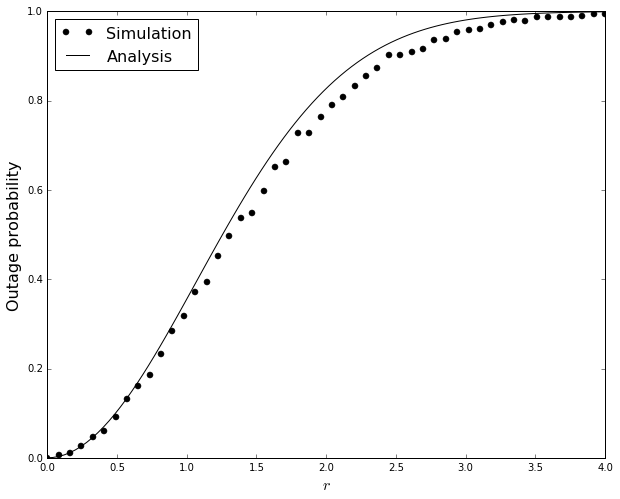

In [9]:
#Testing
import statsmodels.api as sm # recommended import according to the docs
import matplotlib.pyplot as plt
import math
#
k = math.gamma(1 + 2/alpha) * math.gamma(1- 2/alpha)

plt.figure(figsize=(10,8), dpi=1200)
plt.plot(r,outage_prob,'o k',label = "Simulation")
x = np.linspace(0,4,100)
plt.xlabel('$r$', fontsize=16)
plt.ylabel('Outage probability', fontsize=16)
plt.plot(x, 1 -  np.exp(- (x**2) * beta**(2/alpha) * k * np.pi * p * x_average_PPP/(L**2)),'k-' ,label = "Analysis")
plt.axis([0,4,0,1])
plt.legend(loc=2,fontsize=16)
plt.show()

## 4. References

[1] M. Haenggi, *Stochastic Geometry for Wireless Networks*, pages 93-105.